Date
2020-11-05    102372.0
2020-11-06     78626.0
2020-11-07     86758.0
2020-11-08     88328.0
2020-11-09     63489.0
dtype: float64


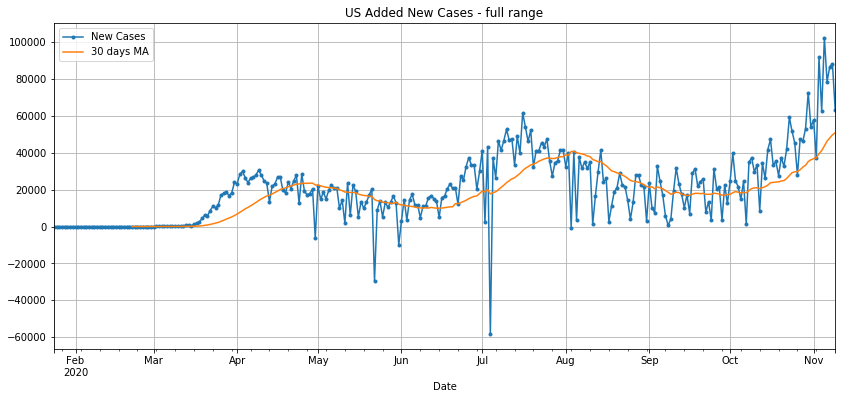

Deaths Per Day
Date
2020-11-05    1173.0
2020-11-06    1154.0
2020-11-07    1036.0
2020-11-08     462.0
2020-11-09     590.0
Name: Dead, dtype: float64
Deaths Per Day
            Daily Deaths Addition
Date                             
2020-11-05                 1173.0
2020-11-06                 1154.0
2020-11-07                 1036.0
2020-11-08                  462.0
2020-11-09                  590.0


<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

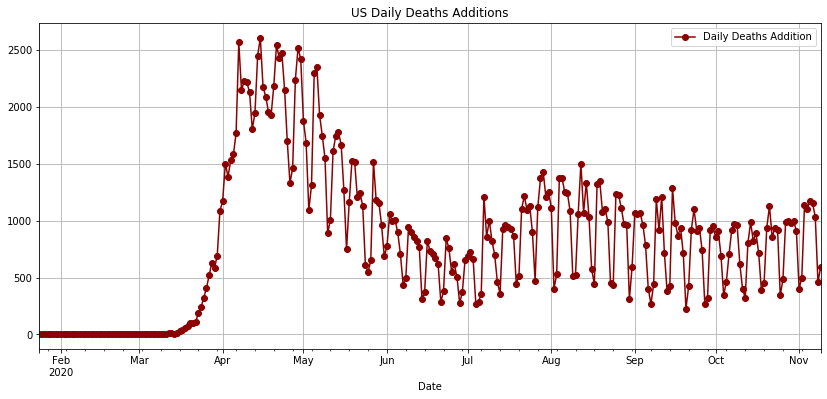

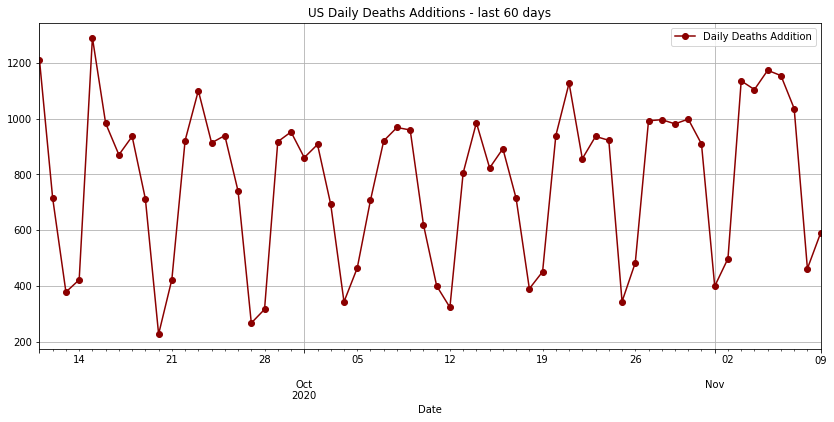

New Cases Per Day
            Daily Cases Addition
Date                            
2020-11-05              141769.0
2020-11-06              108820.0
2020-11-07              128468.0
2020-11-08              118816.0
2020-11-09              111433.0


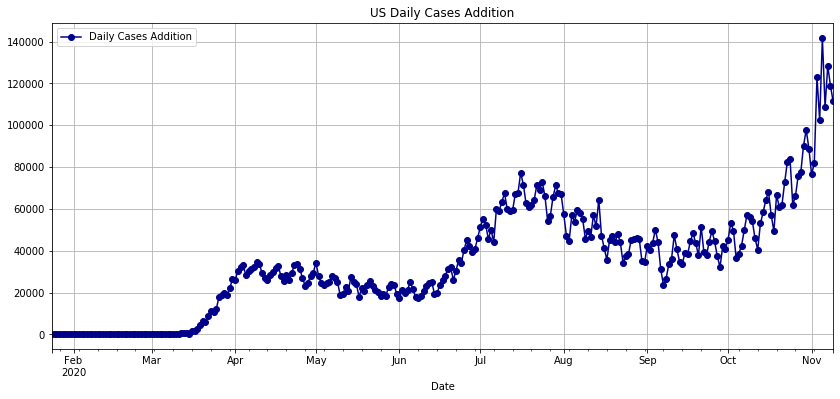

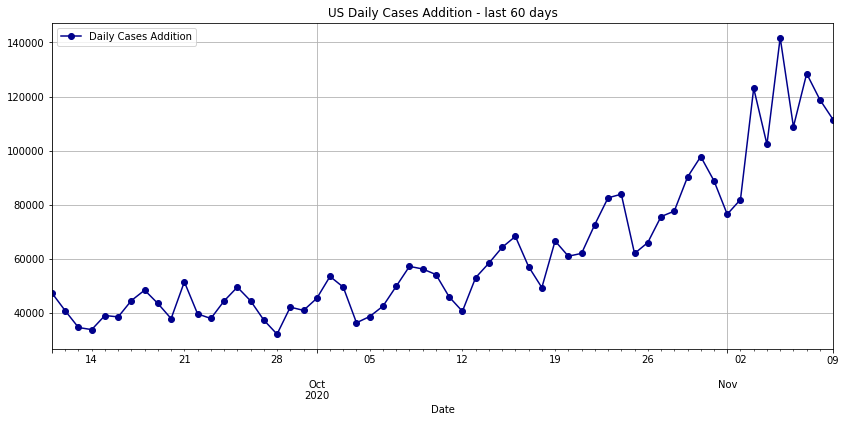

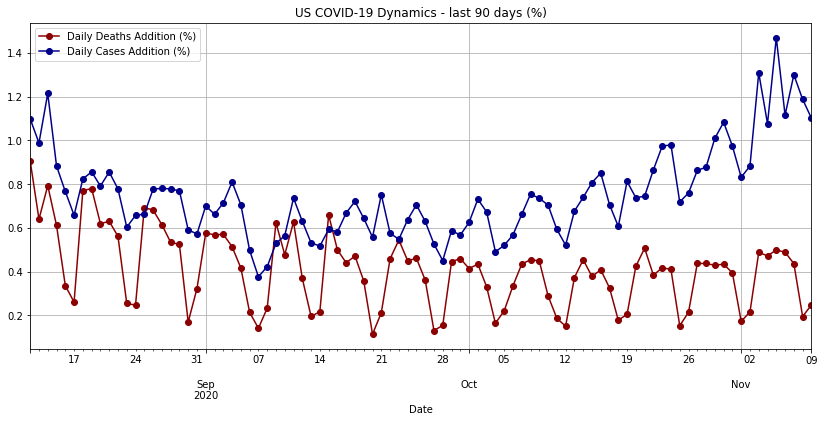

In [1]:
import covid_19_shared
covid_19_shared.Country_COVID19_Stats("US").show()